# UTS

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

## Metode KNN

###Import Library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


### Import dataset dan membaca datanya

In [2]:

url = "https://raw.githubusercontent.com/Amelia039/datamining/gh-pages/dataR2.csv"
df = pd.read_csv(url)
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### Menemukan missing values

In [3]:
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

###Melihat tipe data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


###  Heatmap untuk menemukan korelasi

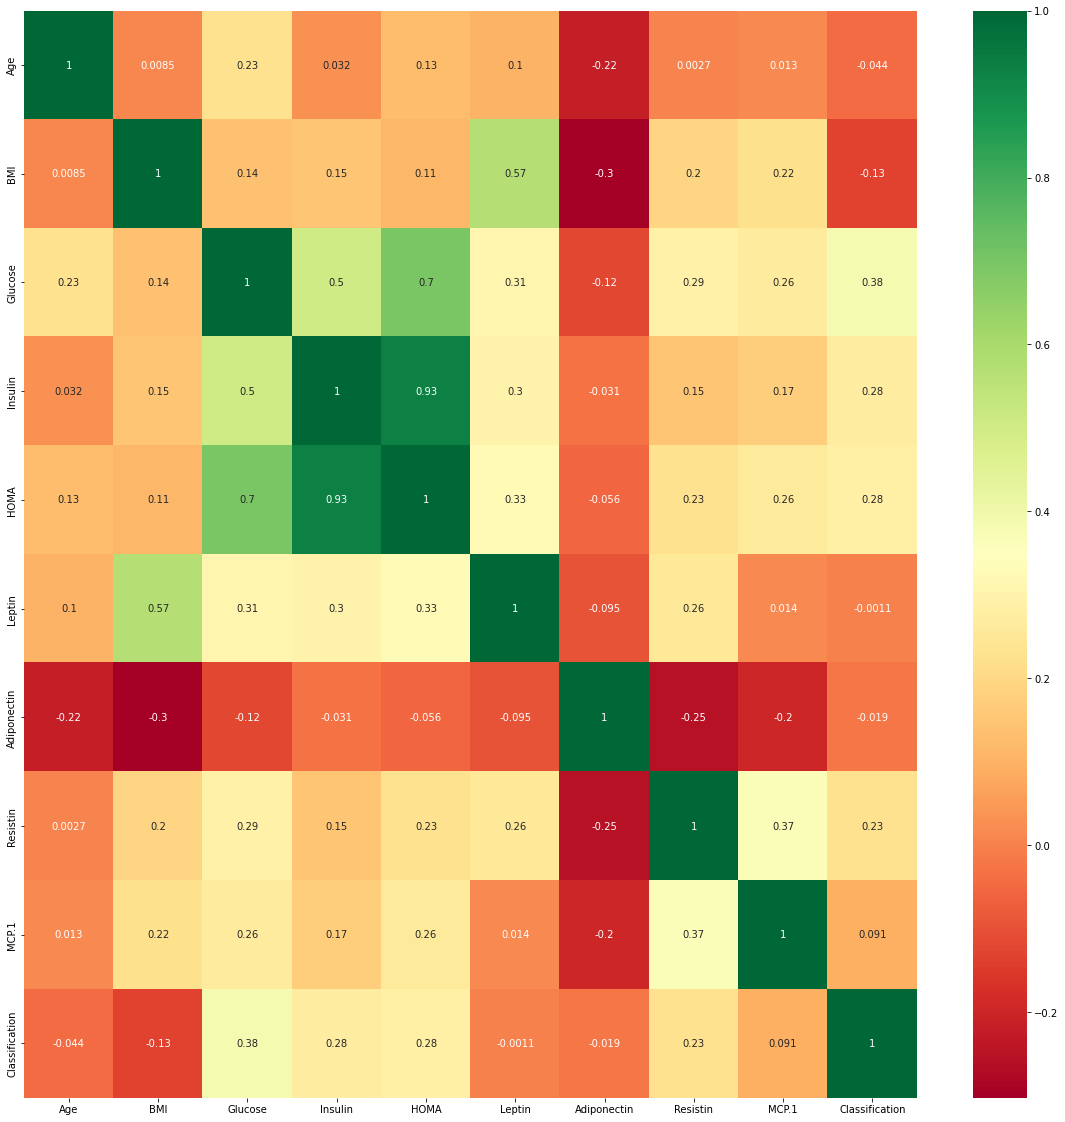

In [5]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

### Melihat kolom data

In [6]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

### Menghitung data

Tahapannya:


1.   Memisahkan kolom Classification dari dataframe
2.   Mengambil kolom Classification untuk target
3.   Memishkan data train dengan data test


####Membuat dataframe dengan semua data training kecuali kolom target(clasification) dan mengecek apakah target sudah dihapus 

In [7]:

X = df.drop(columns=["Classification"])
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


###Memisahkan target values

In [8]:

y = df["Classification"].values  
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

###pisahkan dataset menjadi data latih dan uji

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Membuat klasifikasi **KNN**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Menampilkan 5 prediksi model pertama pada data uji

In [11]:

knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

### Mengecek akurasi model  pada data uji

In [12]:

knn.score(X_test, y_test)

0.3333333333333333

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [14]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [15]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [16]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

Text(0, 0.5, 'Mean Error')

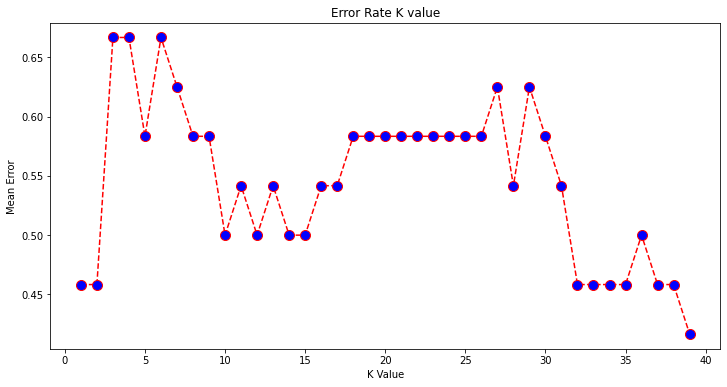

In [17]:
# Calculating error for K values between 1 and 40 
error = []
import matplotlib.pyplot as plt
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', 
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



## Decission tree

## Decision Tree
Pengertian Decision Tree
Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab. Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

###Import Library

In [18]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns


###Mengimport dataset

In [19]:
url = "https://raw.githubusercontent.com/Amelia039/datamining/gh-pages/dataR2.csv"

df = pd.read_csv(url)
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [20]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)


In [21]:
clf

DecisionTreeClassifier()

### Membuat tree plot

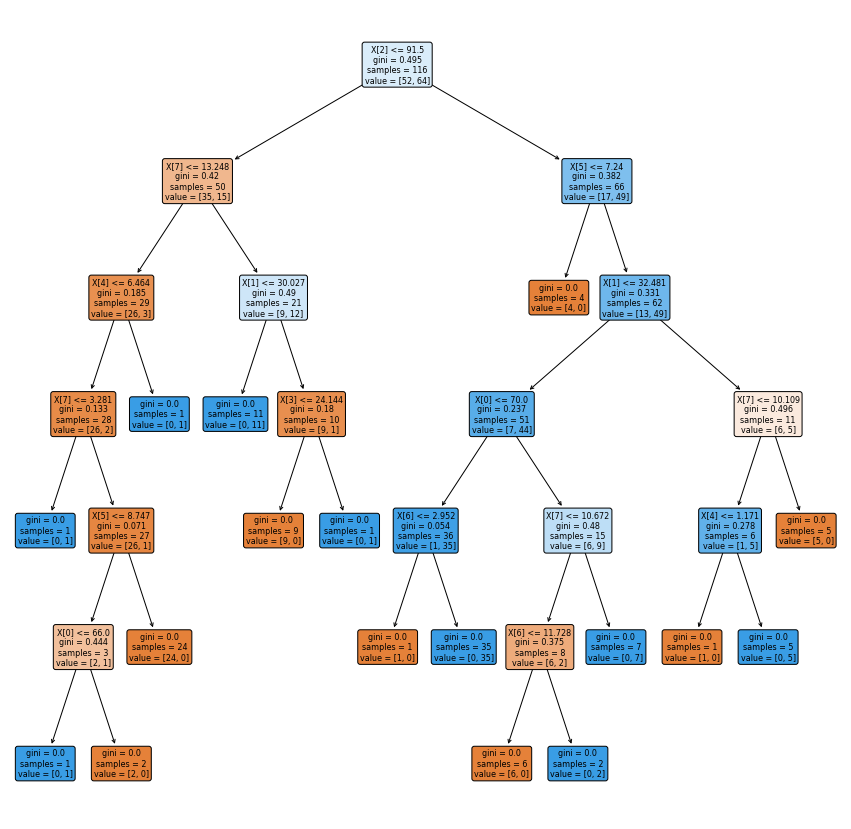

In [22]:

plt.figure(figsize=(15,15))

a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)

plt.show()

In [23]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

